In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('apteka.csv', sep = ';')
df.head()

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09.000,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00.000,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23.000,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56.000,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39.000,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        38486 non-null  object
 1   shop            38486 non-null  object
 2   card            38486 non-null  object
 3   bonus_earned    38486 non-null  int64 
 4   bonus_spent     38486 non-null  int64 
 5   summ            38486 non-null  int64 
 6   summ_with_disc  38486 non-null  int64 
 7   doc_id          38486 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.3+ MB


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df = df[df['card'].str.startswith('2000')]

In [7]:
df = df.sort_values(['card', 'datetime'])
df 

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [8]:
# последняя дата в датасете, довольно давно, поэтому возьмеме ее за точку отсчета - как дату выполнения анализа
max(df['datetime'])

Timestamp('2022-06-09 21:49:45')

In [9]:
# считаем сумму покупок, количество покупок и дату последней покупки
df2 = df.groupby('card').agg(
    purchase_sum = ('summ_with_disc', 'sum'),
    purchase_amount = ('summ_with_disc', 'count'),
    last_purchase = ('datetime', 'last')
).reset_index()
df2.head()

,card,purchase_sum,purchase_amount,last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20
1,2000200150022,1351,1,2021-12-07 20:25:21
2,2000200150053,713,2,2022-03-17 20:50:23
3,2000200150091,3549,5,2022-06-05 11:49:47
4,2000200150107,1735,3,2022-06-02 17:54:19


In [16]:
# что такое последняя покупка? разница в днях между датой проведения анализа и последней покупкой клиента
df2['days_since_last_purchase']  = (max(df['datetime']) - df2['last_purchase']).dt.days

In [17]:
df2.head()

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7


In [38]:
df2['purchase_sum'].describe()

count      5926.000000
mean       3228.801552
std        6670.663099
min          21.000000
25%         724.000000
50%        1470.500000
75%        3297.000000
max      162687.000000
Name: purchase_sum, dtype: float64

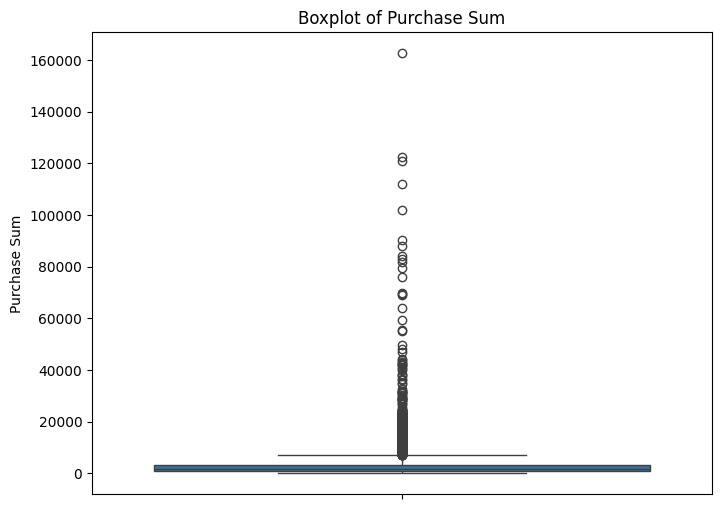

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['purchase_sum'])
plt.title('Boxplot of Purchase Sum')
plt.ylabel('Purchase Sum')
plt.show()

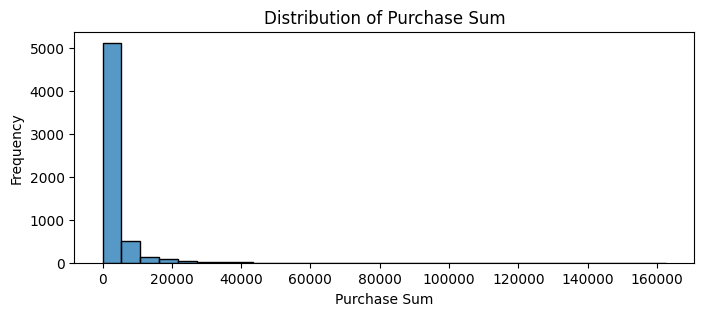

In [48]:

plt.figure(figsize=(8, 3))
sns.histplot(df2['purchase_sum'], bins=30)
plt.title('Distribution of Purchase Sum')
plt.xlabel('Purchase Sum')
plt.ylabel('Frequency')
plt.show();

In [51]:
quantiles = [round(i, 2) for i in np.arange(0.1, 1.1, 0.1)]
quantiles

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [54]:
df2['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

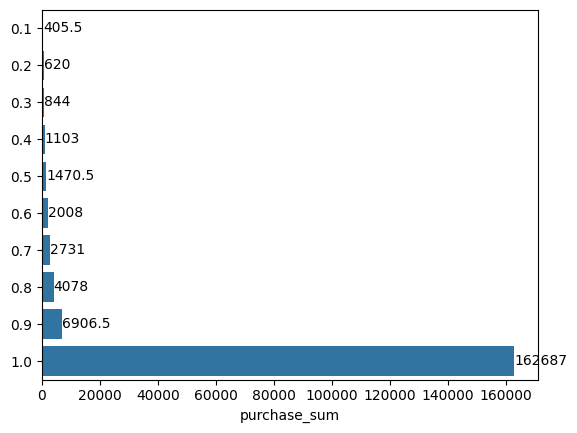

In [55]:
ax = sns.barplot(
    df2['purchase_sum'].quantile(quantiles), 
    orient = 'h'
)
ax.bar_label(ax.containers[-1]);

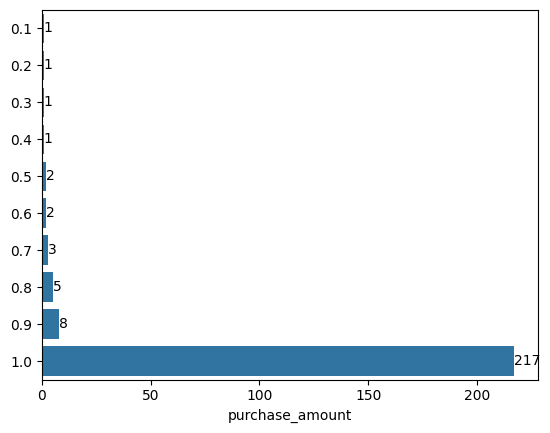

In [56]:
ax = sns.barplot(
    df2['purchase_amount'].quantile(quantiles), 
    orient = 'h'
)
ax.bar_label(ax.containers[-1]);


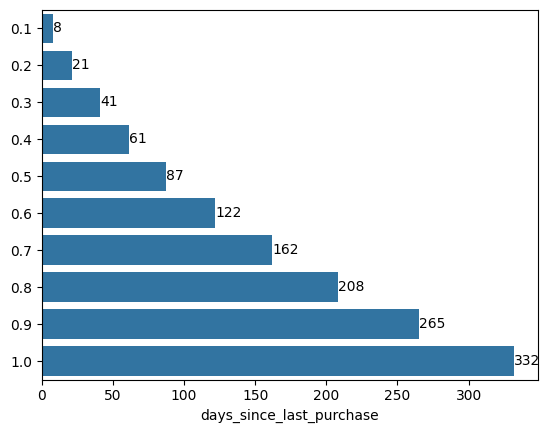

In [57]:
ax = sns.barplot(
    df2['days_since_last_purchase'].quantile(quantiles),
    orient = 'h'
)
ax.bar_label(ax.containers[-1]);

Выбросы не убираем, так как это поведение наших клиентов, это группа 111 - люди, которые покупают очень много на большую сумму и очень часто


1 - топовая группа по признаку monetary и frequency - это большое значение(клиент покупает на большую сумму и часто), а по recency - покупал недавно

2 - середняк

3 - аутсайдеры

In [60]:
# выставим пороговые значения для каждого из трех параметров
quantiles = [0.33, 0.66]

# функция для оценки RFM на основании разделения наших метрик на 3 равные части согласно 33 и 66 перцентилям
def set_score_rfm(value, perc_33, perc_66, var):
    if value < perc_33:
        return 3 if var != 'R' else 1
    elif value < perc_66:
        return 2
    else:
        return 1 if var != 'R' else 3

# применение функции для расчета R, F, и M оценок
for feature, code in zip(['days_since_last_purchase', 'purchase_amount', 'purchase_sum'], ['R', 'F', 'M']):
    quantiles = df2[feature].quantile([0.33, 0.66])
    df2[code] = df2[feature].apply(lambda x: set_score_rfm(x, quantiles.iloc[0], quantiles.iloc[1], code))


In [61]:
df2.head()

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2


In [65]:
df2['RFM'] = df2.apply(lambda row: f"{row['R']}{row['F']}{row['M']}", axis = 1)

In [66]:
df2.head()

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M,RFM
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3,323
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2,322
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3,223
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1,111
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2,112


In [67]:
df3 = df2.groupby('RFM')['RFM'].agg({'count'}).reset_index()
df3

,RFM,count
0,111,862
1,112,203
2,113,32
3,121,118
4,122,340
5,123,395
6,211,488
7,212,223
8,213,34
9,221,176


In [81]:
px.treemap(df3, path=['RFM'], values='count')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'branchvalues': 'total',
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'labels=%{label}<br>count=%{value}<br>parent=%{parent}<br>id=%{id}<extra></extra>',
              'ids': array(['111', '112', '113', '121', '122', '123', '211', '212', '213', '221',
                            '222', '223', '311', '312', '313', '321', '322', '323'], dtype=object),
              'labels': array(['111', '112', '113', '121', '122', '123', '211', '212', '213', '221',
                               '222', '223', '311', '312', '313', '321', '322', '323'], dtype=object),
              'name': '',
              'parents': array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
                               dtype=object),
              'type': 'treemap',
              'values': array([862, 203,  32, 118, 340, 395, 488, 223,  34, 176, 461, 577, 197, 127,
                                19, 174, 601, 899], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})